# **Video game rating dataset**

This is a dataset with 12,254 entries and it is of video games released between 1995 and 2021. It provides the game name, user rating, critic rating, platform, and release date.

The dataset: https://www.kaggle.com/datasets/deepcontractor/top-video-games-19952021-metacritic?resource=download

I would like to see is which console has the highest number of video games rated over 90 by critics.

I would also like to see how the number of game releases per year has changed.

In [129]:
import pandas as pd
import pandas.plotting._matplotlib as plt
import numpy as np
from datetime import datetime


## Part B and C

In [130]:
games = pd.read_csv('all_games.csv')
gamesdf = pd.DataFrame(games)
gamesdf['release_date'] = gamesdf['release_date'].str[-4:]
gamesdf.describe()

,meta_score
count,18800.000000
mean,70.648883
std,12.225006
min,20.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,99.000000


## Part D(1)

In [131]:
gamesdf.columns

Index(['name', 'platform', 'release_date', 'summary', 'meta_score',
       'user_review'],
      dtype='object')

In [ ]:
list(gamesdf.index)

## Part D(2)

Text(0.5, 0, 'Platform')

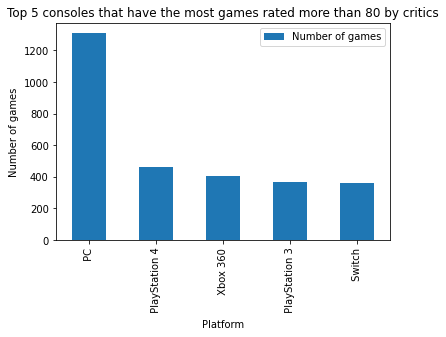

In [135]:
gamesdf_mask=gamesdf[gamesdf.iloc[:,4]>=80]
gamesgrouped = gamesdf_mask.groupby("platform")['name'].count()
gamesgroupedsorted = gamesgrouped.sort_values(ascending = False)
gamesgroupedsortedhead = gamesgroupedsorted.head()
graph = gamesgroupedsortedhead.plot.bar(x='lab', y='val', title="Top 5 consoles that have the most games rated more than 80 by critics", legend = True, label = "Number of games")
graph.set_ylabel("Number of games")
graph.set_xlabel("Platform")

## Part D(3)
Created a pivot table based on the number of games released on a given date by platform

In [136]:
game_quantities = pd.pivot_table(gamesdf,values = "meta_score",  index = ["release_date"], columns = ["platform"], aggfunc ="count")
# game_quantities_condensed = game_quantities.loc[:,game_quantities.columns[game_quantities.iloc[6] > 0]]
game_quantities_condensed = game_quantities_condensed.fillna(0)
game_quantities_condensed

platform,3DS,DS,Dreamcast,Game Boy Advance,GameCube,Nintendo 64,PC,PSP,PlayStation,PlayStation 2,PlayStation 3,PlayStation 4,PlayStation Vita,Switch,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series X
release_date,,,,,,,,,,,,,,,,,,,,
1995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,8.0,11.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,2.0,0.0,0.0,12.0,14.0,0.0,24.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,1.0,70.0,2.0,0.0,22.0,123.0,4.0,64.0,40.0,5.0,2.0,1.0,4.0,2.0,3.0,3.0,8.0,0.0,0.0
2001,1.0,4.0,42.0,57.0,20.0,6.0,162.0,1.0,40.0,140.0,6.0,5.0,1.0,3.0,3.0,1.0,37.0,6.0,5.0,1.0
2002,4.0,8.0,2.0,99.0,110.0,0.0,183.0,3.0,7.0,197.0,9.0,8.0,0.0,5.0,5.0,1.0,126.0,10.0,4.0,0.0
2003,3.0,6.0,2.0,89.0,102.0,1.0,190.0,4.0,3.0,198.0,6.0,3.0,1.0,2.0,9.0,0.0,165.0,12.0,4.0,0.0


## Part D(4)
creating a plot from the data

Text(0.5, 0, 'Year')

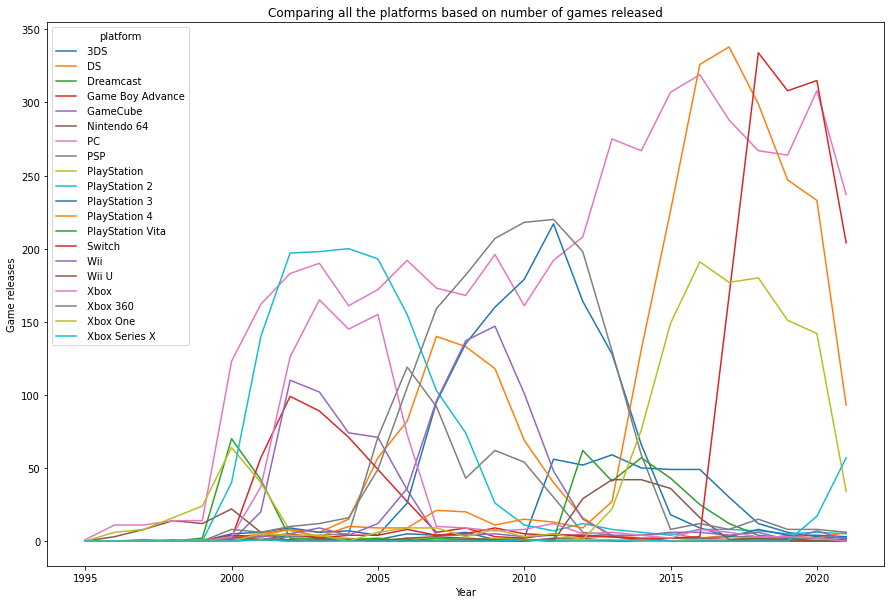

In [137]:
graph2 = game_quantities_condensed.plot(figsize=(15,10), title="Comparing all the platforms based on number of games released")
graph2.set_ylabel("Game releases")
graph2.set_xlabel("Year")

## Part e

For my first question, I did not find it particularly surprising that PC had the most amount of games released that were rated over 90. What I did find surprising though was the margin by which it had the most releases. The next closest was the Playstation 2, but it had less than half the number of highly rated PC games. I think part of this has to do with how long each console has been relavant. PC had been consistently relavant the *whole* time, no other console has been around nearly as long, and as such, they wouldn't have had a fair chance to compete with PC's success.

For my second question, it seems that the number of game releases for consoles follow a bell curve like shape, likely tied with when the console released and when the next improved version of it next released. The only thing that doens't follow this pattern is the PC, and this is likely becasue PC's keep improving but they are technically the same console. A PC from 1995 is technically the same console as a PC from 2021, but the newer one is hundreds if not thousands of times more powerful. One interesting trend I did see for all the consoles that were having more game releases in recent years was that there was a sharp decrease in 2020, and it seems to have fallen even more in 2021. This is likely due to COVID-19 hampering game development. This also makes sense because game development requires lots of really powerful equipment, at least for large games and people won't/don't/couldn't have access to those tools while they worked from home. It may have been possible that they could remotely access those machines, but it would still be a challenge.